In [11]:
import numpy as np
import pandas as pd

# plotly

# word cloud library

# matplotlib
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


input\cwurData.csv
input\database_earthquake.csv
input\education_expenditure_supplementary_data.csv
input\Iris.csv
input\MedianHouseholdIncome2015.csv
input\PercentagePeopleBelowPovertyLevel.csv
input\PercentOver25CompletedHighSchool.csv
input\PoliceKillingsUS.csv
input\school_and_country_table.csv
input\shanghaiData.csv
input\ShareRaceByCity.csv
input\timesData.csv
input\fifa19\data.csv
input\videogamesales\vgsales.csv
input\weatherww2\Summary of Weather.csv
input\weatherww2\Weather Station Locations.csv
input\world-war-ii\operations.csv


In [12]:
# Load data that we will use.
vgsales = pd.read_csv("input/videogamesales/vgsales.csv")
vgsales.head

<bound method NDFrame.head of         Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales

In [13]:
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [14]:
# Lets start with dropping nan values
vgsales.dropna(how="any",inplace = True)
vgsales.Year = vgsales.Year.astype(int)
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int32  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 1.4+ MB


Line Charts


In [18]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

# Initialize plotly for offline use in Jupyter Notebook
init_notebook_mode(connected=True)

# Load your dataset (example dataset, replace with actual path)
# df = pd.read_csv('path_to_vgsales.csv')

# For demonstration, let's create a sample DataFrame similar to vgsales
data = {
    'Rank': range(1, 101),
    'Name': [f'Game {i}' for i in range(1, 101)],
    'NA_Sales': np.random.rand(100) * 10,
    'EU_Sales': np.random.rand(100) * 10
}
df = pd.DataFrame(data)

# Creating trace1
trace1 = go.Scatter(
                    x = df.Rank,
                    y = df.NA_Sales,
                    mode = "lines",
                    name = "NA_Sales",
                    marker = dict(color = 'rgba(69, 40, 202, 0.8)'),
                    text= df.Name)
# Creating trace2
trace2 = go.Scatter(
                    x = df.Rank,
                    y = df.EU_Sales,
                    mode = "lines+markers",
                    name = "EU_Sales",
                    marker = dict(color = 'rgba(227, 134, 211, 0.8)'),
                    text= df.Name)

data = [trace1, trace2]
layout = dict(title = 'Sales in North America (in millions) and Sales in Europe (in millions) vs Rank of Top 100 Video Games',
              xaxis= dict(title= 'World Rank', ticklen= 9, zeroline= True)
             )
fig = dict(data = data, layout = layout)
iplot(fig)


Scatter

In [19]:
# prepare data frames
df2010 = vgsales[vgsales.Year == 2010].iloc[:100,:]
df2011 = vgsales[vgsales.Year == 2011].iloc[:100,:]
df2012 = vgsales[vgsales.Year == 2012].iloc[:100,:]
# import graph objects as "go"
import plotly.graph_objs as go
# creating trace1
trace1 =go.Scatter(
                    x = df2010.Rank,
                    y = df2010.Global_Sales,
                    mode = "markers",
                    name = "2010",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= df2010.Name)
# creating trace2
trace2 =go.Scatter(
                    x = df2011.Rank,
                    y = df2011.Global_Sales,
                    mode = "markers",
                    name = "2011",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text= df2011.Name)
# creating trace3
trace3 =go.Scatter(
                    x = df2012.Rank,
                    y = df2012.Global_Sales,
                    mode = "markers",
                    name = "2012",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text= df2012.Name)
data = [trace1, trace2, trace3]
layout = dict(title = 'Total Worldwide Sales (in millions) vs World Rank of top 100 Games with 2010, 2011 and 2012 years',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Worldwide Sales',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

Bar Charts


In [20]:
# prepare data frames
df2015 = vgsales[vgsales.Year == 2015].iloc[:3,:]
df2015

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
33,34,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
77,78,FIFA 16,PS4,2015,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
92,93,Star Wars Battlefront (2015),PS4,2015,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67


In [21]:
# import graph objects as "go"
import plotly.graph_objs as go
# create trace1 
trace1 = go.Bar(
                x = df2015.Name,
                y = df2015.EU_Sales,
                name = "Sales in Europe",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df2015.Platform)
# create trace2 
trace2 = go.Bar(
                x = df2015.Name,
                y = df2015.JP_Sales,
                name = "Sales in Japan",
                marker = dict(color = 'rgba(255, 255, 128, 0.5)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df2015.Platform)
data = [trace1, trace2]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout = layout)
iplot(fig)

Pie Charts


In [22]:
# data preparation
df2014 = vgsales[vgsales.Year == 2014].iloc[:5,:]
pie1 = df2014.Global_Sales
labels = df2014.Name
# figure
fig = {
  "data": [
    {
      "values": pie1,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "name": "Toatal Sales Rates",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Video Games Total Sales Rates",
        "annotations": [
            { "font": { "size": 1},
              "showarrow": False,
              "text": "Total Sales",
                "x": 0.20,
                "y": 1
            },
        ]
    }
}
iplot(fig)

Bubble Charts


In [23]:
# data preparation
df2015 = vgsales[vgsales.Year == 2015].iloc[:20,:]

data = [
    {
        'y': df2015.NA_Sales,
        'x': df2015.Rank,
        'mode': 'markers',
        'marker': {
            'color': df2015.EU_Sales,
            'size': df2015.Global_Sales,
            'showscale': True
        },
        "text" :  df2015.Name    
    }
]
iplot(data)

Histogram


In [24]:
# prepare data
x2011 = vgsales[vgsales.Year == 2011].iloc[:200,:]
x2012 = vgsales[vgsales.Year == 2012].iloc[:200,:]
x2011=x2011.Global_Sales
x2012=x2012.Global_Sales

trace1 = go.Histogram(
    x=x2011,
    opacity=0.75,
    name = "2011",
    marker=dict(color='rgba(0, 250, 0, 0.6)'))
trace2 = go.Histogram(
    x=x2012,
    opacity=0.75,
    name = "2012",
    marker=dict(color='rgba(190, 0, 150, 0.6)'))

data = [trace1, trace2]
layout = go.Layout(barmode='overlay',
                   title=' Global Sales in 2011 and 2012',
                   xaxis=dict(title='Global Sales'),
                   yaxis=dict( title='Count'),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

Word Cloud


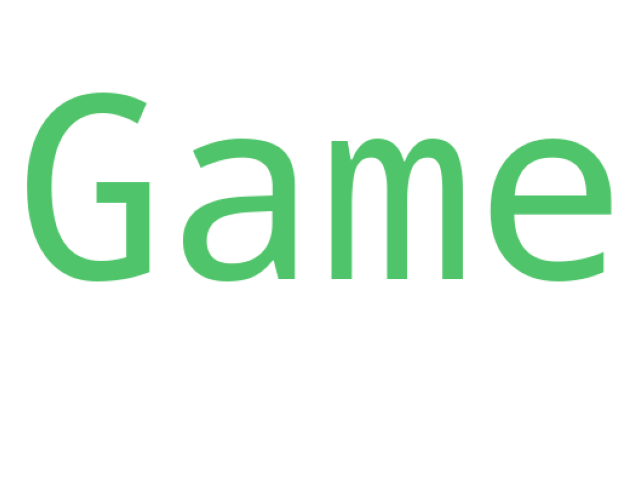

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load your dataset (example dataset, replace with actual path)
# df = pd.read_csv('path_to_vgsales.csv')

# For demonstration, let's create a sample DataFrame similar to vgsales
data = {
    'Name': [f'Game {i}' for i in range(1, 101)],
    'Year': np.random.choice([2010, 2011, 2012], 100)
}
vgsales = pd.DataFrame(data)

# Data preparation for the word cloud
x2011 = vgsales.Name[vgsales.Year == 2011]
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(x2011))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()


Box Plots


In [29]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

# Initialize plotly for offline use in Jupyter Notebook
init_notebook_mode(connected=True)

data = {
    'Rank': range(1, 101),
    'Name': [f'Game {i}' for i in range(1, 101)],
    'Year': np.random.choice([2015, 2014, 2013], 100),
    'Global_Sales': np.random.rand(100) * 10,
    'EU_Sales': np.random.rand(100) * 5
}
vgsales = pd.DataFrame(data)

# Data preparation
x2015 = vgsales[vgsales.Year == 2015].iloc[:100,:]  # For first 100 Video Games

trace0 = go.Box(
    y=x2015.Global_Sales,
    name = 'Global Sales of Video Games in 2015',
    marker = dict(
        color = 'rgb(255, 0, 0)',
    )
)
trace1 = go.Box(
    y=x2015.EU_Sales,
    name = 'Europe Sales of Video Games in 2015',
    marker = dict(
        color = 'rgb(0, 0, 255)',
    )
)
data = [trace0, trace1]
iplot(data)


Scatter Matrix Plots


In [31]:
import numpy as np
import pandas as pd
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot

# Initialize plotly for offline use in Jupyter Notebook
init_notebook_mode(connected=True)

# For demonstration, let's create a sample DataFrame similar to vgsales
data = {
    'Rank': range(1, 101),
    'Name': [f'Game {i}' for i in range(1, 101)],
    'Year': np.random.choice([2015, 2014, 2013], 100),
    'NA_Sales': np.random.rand(100) * 10,
    'EU_Sales': np.random.rand(100) * 5,
    'JP_Sales': np.random.rand(100) * 2
}
vgsales = pd.DataFrame(data)

# Prepare data
dataframe = vgsales[vgsales.Year == 2015]
data2015 = dataframe.loc[:, ["NA_Sales", "EU_Sales", "JP_Sales"]]
data2015["index"] = np.arange(1, len(data2015) + 1)

# Create scatterplot matrix
fig = ff.create_scatterplotmatrix(data2015, diag='box', index='index', colormap='Portland',
                                  colormap_type='cat', height=700, width=700)

# Plot the figure
iplot(fig)


3D Scatter Plot with Colorscaling


In [33]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

# Initialize plotly for offline use in Jupyter Notebook
init_notebook_mode(connected=True)

data = {
    'Rank': range(1, 101),
    'Name': [f'Game {i}' for i in range(1, 101)],
    'Year': np.random.choice([2015, 2014, 2013], 100),
    'NA_Sales': np.random.rand(100) * 10,
    'EU_Sales': np.random.rand(100) * 5,
    'JP_Sales': np.random.rand(100) * 2,
    'Other_Sales': np.random.rand(100) * 3
}
vgsales = pd.DataFrame(data)

# Filter data for the year 2015
dataframe = vgsales[vgsales.Year == 2015]

# Create trace 1 that is a 3D scatter plot
trace1 = go.Scatter3d(
    x=dataframe.Rank,
    y=dataframe.Other_Sales,
    z=dataframe.JP_Sales,
    mode='markers',
    marker=dict(
        size=10,
        color='rgb(0,0,255)',
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)


Multiple Subplots

In [35]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

# Initialize plotly for offline use in Jupyter Notebook
init_notebook_mode(connected=True)

# For demonstration, let's create a sample DataFrame similar to vgsales
data = {
    'Rank': range(1, 101),
    'Name': [f'Game {i}' for i in range(1, 101)],
    'Year': np.random.choice([2015, 2014, 2013], 100),
    'NA_Sales': np.random.rand(100) * 10,
    'EU_Sales': np.random.rand(100) * 5,
    'JP_Sales': np.random.rand(100) * 2,
    'Global_Sales': np.random.rand(100) * 15
}
vgsales = pd.DataFrame(data)

# Filter data for the year 2015
dataframe = vgsales[vgsales.Year == 2015]

# Create traces for each sales region
trace1 = go.Scatter(
    x=dataframe.Rank,
    y=dataframe.Global_Sales,
    name="Global_Sales"
)
trace2 = go.Scatter(
    x=dataframe.Rank,
    y=dataframe.EU_Sales,
    xaxis='x2',
    yaxis='y2',
    name="EU_Sales"
)
trace3 = go.Scatter(
    x=dataframe.Rank,
    y=dataframe.JP_Sales,
    xaxis='x3',
    yaxis='y3',
    name="JP_Sales"
)
trace4 = go.Scatter(
    x=dataframe.Rank,
    y=dataframe.NA_Sales,
    xaxis='x4',
    yaxis='y4',
    name="NA_Sales"
)

data = [trace1, trace2, trace3, trace4]

# Define layout for the subplots
layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.45]
    ),
    yaxis=dict(
        domain=[0, 0.45]
    ),
    xaxis2=dict(
        domain=[0.55, 1]
    ),
    xaxis3=dict(
        domain=[0, 0.45],
        anchor='y3'
    ),
    xaxis4=dict(
        domain=[0.55, 1],
        anchor='y4'
    ),
    yaxis2=dict(
        domain=[0, 0.45],
        anchor='x2'
    ),
    yaxis3=dict(
        domain=[0.55, 1]
    ),
    yaxis4=dict(
        domain=[0.55, 1],
        anchor='x4'
    ),
    title='NA_Sales, EU_Sales, JP_Sales and Global_Sales VS World Rank of Video Games'
)

# Create the figure with data and layout
fig = go.Figure(data=data, layout=layout)

# Plot the figure
iplot(fig)
